In [1]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import re

from ml_final_project.config import MPL_STYLE_DIR, PROCESSED_DATA_DIR

# Use opinionated custom style for plots
plt.style.use(MPL_STYLE_DIR / "iragca_ml.mplstyle")

2025-05-10 08:10:10.682 | INFO     | ml_final_project.config:<module>:11 - PROJ_ROOT path is: D:\Documents\3 Production Save Files\1 Cloned repositories\ml-final-project


In [2]:
dataPath = PROCESSED_DATA_DIR / "CivilServiceCommission" / "civilservicecommission.parquet"
df = pl.read_parquet(dataPath)
df

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str
4235342,"""BICOL MEDICAL CENTER""","""Region V""","""Division Office, Division of A…",2024-12-06,2024-12-16,"""NURSE III""","""14""",33843,"""PBET/LET/RA1080 Teacher""","""Bachelor's degree in""","""None Required""","""None Required""","""N/A""","""OSEC-DOHB-NURS3-390074-2015"""
4267059,"""COTABATO REGIONAL AND MEDICAL …","""Region XII""","""PETDU-CRMC Cotabato City""",2025-01-08,2025-01-18,"""Training Specialist II""","""15""",38413,"""Career Service Professional/Se…","""Bachelor'S Degree""","""Specialist II""","""1 Year Of Relevant""","""""","""OSEC-DOHB-TRNSP2-840012-2024"""
4325512,"""DEPARTMENT OF EDUCATION""","""Region XII""","""ELEMENTARY- SDO SULTAN KUDARAT""",2025-02-07,2025-02-17,"""Head Teacher IV""","""17""",47247,"""RA 1080, as amended (Teacher)""","""Bachelor's degree in Elementar…","""24 hours of relevant training""","""HT for 3 years; or MT for 2 ye…","""""","""OSEC-DECSB-HTEACH4-840037-2021"""
4347023,"""MANILA, NCR""","""NCR""","""ELEMENTARY SCHOOLS""",2025-02-19,2025-03-03,"""TEACHER III""","""13""",34421,"""RA 1080 (TEACHER)""","""BEED or Bachelor's Degree plus…","""None Required""","""2 years of relevant experience""","""Not Applicable""","""OSEC-DECSB-TCH3-33077-1998"""
4318456,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Sta. Cruz National High School""",2025-02-04,2025-02-14,"""MASTER TEACHER I (Secondary Gr…","""18""",51304,"""PBET/Teacher/RA 1080""","""Bachelor of Secondary""","""None Required""","""3 Years Relevant""","""N/A""","""OSEC-DECSB-MTCHR1-750206-2021"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4247090,"""DEPARTMENT OF EDUCATION""","""Region IV""","""Schools Division of Lipa City …",2024-12-17,2024-12-27,"""Teacher II""","""12""",30705,"""RA 1080, Teacher""","""Bachelor of Secondary""","""None Required""","""1 year of relevant experience""","""N/A""","""OSEC-DECSB-TCH2-240048-2001"""
4319185,"""BUREAU OF CORRECTIONS""","""NCR""","""Bureau of Corrections""",2025-01-14,2025-01-24,"""Corrections Officer I""","""11""",29668,"""RA 1080/ CS Professional/ CSC …","""Bachelor's Degree""","""None required""","""None required""","""N/A""","""BCORB-CO1-890-2024"""
4365994,"""DEPARTMENT OF EDUCATION""","""Region V""","""Elementary""",2025-02-24,2025-03-07,"""Teacher III""","""13""",34421,"""RA 1080 (Teacher)""","""Bachelor of Elementary""","""None Required""","""2 years relevant experience""","""N/A""","""OSEC-DECSB-TCH3-391749-2020"""


In [8]:
step1 = df.filter(pl.col("MonthlySalary") > 100)

q1 = step1["MonthlySalary"].quantile(0.25)
q3 = step1["MonthlySalary"].quantile(0.75)
iqr = q3 - q1

step2 = step1.filter(
        (pl.col("MonthlySalary") >= q1 - 1.5 * iqr)
        & (pl.col("MonthlySalary") <= q3 + 1.5 * iqr)
    )

processed_df = step2
processed_df

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str
4235342,"""BICOL MEDICAL CENTER""","""Region V""","""Division Office, Division of A…",2024-12-06,2024-12-16,"""NURSE III""","""14""",33843,"""PBET/LET/RA1080 Teacher""","""Bachelor's degree in""","""None Required""","""None Required""","""N/A""","""OSEC-DOHB-NURS3-390074-2015"""
4267059,"""COTABATO REGIONAL AND MEDICAL …","""Region XII""","""PETDU-CRMC Cotabato City""",2025-01-08,2025-01-18,"""Training Specialist II""","""15""",38413,"""Career Service Professional/Se…","""Bachelor'S Degree""","""Specialist II""","""1 Year Of Relevant""","""""","""OSEC-DOHB-TRNSP2-840012-2024"""
4325512,"""DEPARTMENT OF EDUCATION""","""Region XII""","""ELEMENTARY- SDO SULTAN KUDARAT""",2025-02-07,2025-02-17,"""Head Teacher IV""","""17""",47247,"""RA 1080, as amended (Teacher)""","""Bachelor's degree in Elementar…","""24 hours of relevant training""","""HT for 3 years; or MT for 2 ye…","""""","""OSEC-DECSB-HTEACH4-840037-2021"""
4347023,"""MANILA, NCR""","""NCR""","""ELEMENTARY SCHOOLS""",2025-02-19,2025-03-03,"""TEACHER III""","""13""",34421,"""RA 1080 (TEACHER)""","""BEED or Bachelor's Degree plus…","""None Required""","""2 years of relevant experience""","""Not Applicable""","""OSEC-DECSB-TCH3-33077-1998"""
4318456,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Sta. Cruz National High School""",2025-02-04,2025-02-14,"""MASTER TEACHER I (Secondary Gr…","""18""",51304,"""PBET/Teacher/RA 1080""","""Bachelor of Secondary""","""None Required""","""3 Years Relevant""","""N/A""","""OSEC-DECSB-MTCHR1-750206-2021"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4247090,"""DEPARTMENT OF EDUCATION""","""Region IV""","""Schools Division of Lipa City …",2024-12-17,2024-12-27,"""Teacher II""","""12""",30705,"""RA 1080, Teacher""","""Bachelor of Secondary""","""None Required""","""1 year of relevant experience""","""N/A""","""OSEC-DECSB-TCH2-240048-2001"""
4319185,"""BUREAU OF CORRECTIONS""","""NCR""","""Bureau of Corrections""",2025-01-14,2025-01-24,"""Corrections Officer I""","""11""",29668,"""RA 1080/ CS Professional/ CSC …","""Bachelor's Degree""","""None required""","""None required""","""N/A""","""BCORB-CO1-890-2024"""
4365994,"""DEPARTMENT OF EDUCATION""","""Region V""","""Elementary""",2025-02-24,2025-03-07,"""Teacher III""","""13""",34421,"""RA 1080 (Teacher)""","""Bachelor of Elementary""","""None Required""","""2 years relevant experience""","""N/A""","""OSEC-DECSB-TCH3-391749-2020"""


In [9]:
processed_df["Experience"]

Experience
str
"""None Required"""
"""1 Year Of Relevant"""
"""HT for 3 years; or MT for 2 ye…"
"""2 years of relevant experience"""
"""3 Years Relevant"""
…
"""1 year of relevant experience"""
"""None required"""
"""2 years relevant experience"""


In [ ]:
def word2number(s):
    """Convert words to numbers."""
    numbers = {
        "one": 1,
        "two": 2,
        "three": 3,
        "four": 4,
            "five": 5,
        "six": 6,
        "seven": 7,
        "eight": 8,
        "nine": 9,
        "ten": 10,
    }
    s = s.lower()
    sentence = s.split(" ")
    numbers_list = [word for word in sentence if word in numbers.keys()]
    numbers_list = [numbers[word] for word in numbers_list]

    return sum(numbers_list) / len(numbers_list) if numbers_list else 0

In [38]:
def months_handler(s):
    """Convert months to numbers."""
    sentence = s.lower().split(" ")
    numbers_list = [int(word) for word in sentence if word.isdigit()]

    YEAR = 12

    months = []
    for month in numbers_list:
        months.append(month / YEAR)

    return sum(months) / len(months) if months else 0

In [4]:
word2number("Two one year of relevant experience")

1.5

In [39]:
def map_experience(experience: str) -> int:
    try:
        if len(experience) == 0:
            return 0

        if "none" in experience.lower():
            return 0

        if "not required" in experience.lower():
            return 0

        if "hours" in experience.lower():
            return 0
        
        if "hrs" in experience.lower():
            return 0
        
        if "not specified" in experience.lower():
            return 0

        if "no experience" in experience.lower():
            return 0

        if "non required" in experience.lower():
            return 0
        
        if "month" in experience.lower():
            return months_handler(experience)

        # numbers = [int(num) for num in re.findall(r"\d+", experience)]

        sentence = experience.lower().split(" ")
        numbers_list = [int(word) for word in sentence if word.isdigit()]
        numbers = numbers_list


        # Compute the average
        if numbers:
            avg = sum(numbers) / len(numbers)
            return avg
        else:
            return word2number(experience)
    except ValueError:
        print(f"Warning: Failed to parse string: '{experience}'")


mapped_experience = df.with_columns(
    pl.col("Experience")
    .map_elements(lambda x: map_experience(x), return_dtype=pl.Float32)
    .alias("Experience_years")
)
mapped_experience
# map_experience("2 years relevant experience CSC Resolution No. 09-0080")

jobId,Agency,Region,PlaceOfAssignment,Posting Date,Closing Date,Position Title,SalaryGrade,MonthlySalary,Eligibility,Education,Training,Experience,Competency,Plantilla Item No.,Experience_years
i32,str,str,str,date,date,str,str,i32,str,str,str,str,str,str,f32
4235342,"""BICOL MEDICAL CENTER""","""Region V""","""Division Office, Division of A…",2024-12-06,2024-12-16,"""NURSE III""","""14""",33843,"""PBET/LET/RA1080 Teacher""","""Bachelor's degree in""","""None Required""","""None Required""","""N/A""","""OSEC-DOHB-NURS3-390074-2015""",0.0
4267059,"""COTABATO REGIONAL AND MEDICAL …","""Region XII""","""PETDU-CRMC Cotabato City""",2025-01-08,2025-01-18,"""Training Specialist II""","""15""",38413,"""Career Service Professional/Se…","""Bachelor'S Degree""","""Specialist II""","""1 Year Of Relevant""","""""","""OSEC-DOHB-TRNSP2-840012-2024""",1.0
4325512,"""DEPARTMENT OF EDUCATION""","""Region XII""","""ELEMENTARY- SDO SULTAN KUDARAT""",2025-02-07,2025-02-17,"""Head Teacher IV""","""17""",47247,"""RA 1080, as amended (Teacher)""","""Bachelor's degree in Elementar…","""24 hours of relevant training""","""HT for 3 years; or MT for 2 ye…","""""","""OSEC-DECSB-HTEACH4-840037-2021""",2.5
4347023,"""MANILA, NCR""","""NCR""","""ELEMENTARY SCHOOLS""",2025-02-19,2025-03-03,"""TEACHER III""","""13""",34421,"""RA 1080 (TEACHER)""","""BEED or Bachelor's Degree plus…","""None Required""","""2 years of relevant experience""","""Not Applicable""","""OSEC-DECSB-TCH3-33077-1998""",2.0
4318456,"""DEPARTMENT OF EDUCATION""","""Region XI""","""Sta. Cruz National High School""",2025-02-04,2025-02-14,"""MASTER TEACHER I (Secondary Gr…","""18""",51304,"""PBET/Teacher/RA 1080""","""Bachelor of Secondary""","""None Required""","""3 Years Relevant""","""N/A""","""OSEC-DECSB-MTCHR1-750206-2021""",3.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4247090,"""DEPARTMENT OF EDUCATION""","""Region IV""","""Schools Division of Lipa City …",2024-12-17,2024-12-27,"""Teacher II""","""12""",30705,"""RA 1080, Teacher""","""Bachelor of Secondary""","""None Required""","""1 year of relevant experience""","""N/A""","""OSEC-DECSB-TCH2-240048-2001""",1.0
4319185,"""BUREAU OF CORRECTIONS""","""NCR""","""Bureau of Corrections""",2025-01-14,2025-01-24,"""Corrections Officer I""","""11""",29668,"""RA 1080/ CS Professional/ CSC …","""Bachelor's Degree""","""None required""","""None required""","""N/A""","""BCORB-CO1-890-2024""",0.0
4365994,"""DEPARTMENT OF EDUCATION""","""Region V""","""Elementary""",2025-02-24,2025-03-07,"""Teacher III""","""13""",34421,"""RA 1080 (Teacher)""","""Bachelor of Elementary""","""None Required""","""2 years relevant experience""","""N/A""","""OSEC-DECSB-TCH3-391749-2020""",2.0


<Axes: ylabel='Count'>

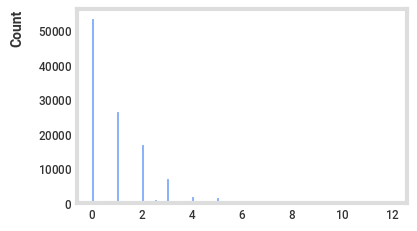

In [43]:
sns.histplot(mapped_experience["Experience_years"])

In [40]:
mapped_experience["Experience_years"].max()

12.0

In [37]:
mapped_experience.filter(pl.col("Experience_years") > 5)["Experience"]

Experience
str
"""6 months of relevant teaching …"
"""6 months of relevant teaching …"
"""6 months of relevant teaching …"
"""6 months of relevant or 6 mont…"
"""6 years experience in technolo…"
…
"""6 months experience in the pre…"
"""9 years of relevant experience"""
"""6 years of experience in banki…"


In [44]:
dataPath2 = PROCESSED_DATA_DIR / "CivilServiceCommission" / "civilservicecommission-2.parquet"

mapped_experience.write_parquet(dataPath2)